# Classification

In [20]:
import sklearn
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Our first step here was to initialize and shuffle the dataframe

In [2]:
df = pd.read_pickle('combined.pkl')

In [3]:
df = df.drop(['ID', 'Preview', 'Sampling Rate'], axis=1)

In [4]:
df = df.sample(frac=1)

In [5]:
df.head()

,Duration,Explicit,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Time Series,Log Mel,MFCC,Genre
24,268360,False,74,0.640,0.8640,7,-6.576,1,0.0315,0.00832,0.000,0.123,0.7000,102.026,4,"[0.10590558, 0.19711645, 0.13088821, 0.1128118...","[[16.534817, 10.453264, -0.5469831, -3.4472501...","[[-0.1322102, 0.08087217, 0.35945794, 1.190186...",Rock
333,163133,True,62,0.907,0.6250,1,-5.557,1,0.1980,0.00420,0.000,0.151,0.6050,99.918,4,"[-0.21343508, -0.36110637, -0.36066702, -0.393...","[[19.154411, 17.669077, 17.2517, 15.003145, 20...","[[0.42723012, 0.5915232, 0.11076518, -1.238277...",Hip Hop
445,144892,True,66,0.830,0.5710,9,-5.935,1,0.2590,0.00249,0.000,0.106,0.1690,121.834,4,"[-0.21971454, -0.30678064, -0.26894784, -0.325...","[[16.474455, 18.05169, 18.902544, 20.99416, 18...","[[-0.1531789, 1.1458981, -0.18020296, 0.024294...",Hip Hop
215,256586,False,39,0.209,0.0407,5,-20.998,1,0.0450,0.99500,0.894,0.109,0.0788,66.236,3,"[0.025660956, 0.062639564, 0.08560159, 0.10003...","[[-8.026685, -13.733593, -27.654322, -26.81711...","[[1.9252516, 0.38760468, 0.40050322, 1.4157614...",Classical
453,227132,True,58,0.912,0.5150,1,-4.770,1,0.0712,0.06480,0.000,0.133,0.0641,126.013,4,"[-0.13140564, -0.27910855, -0.30138627, -0.332...","[[31.903458, 32.209827, 32.415005, 32.497406, ...","[[-0.55969465, 0.5004339, 0.027416136, -0.1669...",Hip Hop


Unfortunately, we ran into some significant issues trying to work with our extracted audio features, which each had hundreds of thousands of values. 

For the time being, we decided to temporarily drop them and see how our classifier did with Spotify's features only

In [6]:
tdf = df.drop(['Time Series', 'Log Mel', 'MFCC'], axis=1)

In [7]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [8]:
clf.fit(tdf[:675].drop(['Genre'], axis=1), y=tdf[:675]['Genre'])

GaussianNB(priors=None, var_smoothing=1e-09)

The model seems to do decently with only Spotify's features, with an accuracy of 69.33%

In [9]:
preds = clf.predict(tdf[675:].drop(['Genre'], axis=1))
(preds == tdf[675:]['Genre']).mean()

0.6933333333333334

To still make use of the features we added, we tried a simple approach: simply take the mean and standard deviation of each of the chain of values.

In [10]:
df['TS_mean'] = df['Time Series'].apply(lambda x: np.mean(x))
df['TS_std'] = df['Time Series'].apply(lambda x: np.std(x))
df['LM_mean'] = df['Log Mel'].apply(lambda x: np.mean(x))
df['LM_std'] = df['Log Mel'].apply(lambda x: np.std(x))
df['MFCC_mean'] = df['MFCC'].apply(lambda x: np.mean(x))
df['MFCC_std'] = df['MFCC'].apply(lambda x: np.std(x))
df = df.drop(['Time Series', 'Log Mel', 'MFCC'], axis=1)

It turns out that these features were actually quite significant- !  
This improved our model considerably, giving it a new accuracy of 0.773

In [11]:
clf.fit(df[:675].drop(['Genre'], axis=1), y=df[:675]['Genre'])
preds = clf.predict(df[675:].drop(['Genre'], axis=1))
(preds == df[675:]['Genre']).mean()

0.7733333333333333

Following this, we decided to analyze how it did on the individual genres.

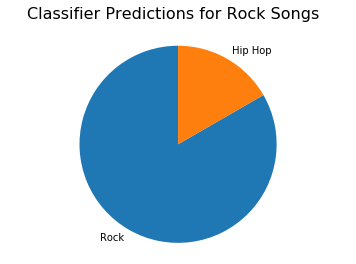

In [28]:
labels = pd.Series(preds[df[675:]['Genre'] == 'Rock']).value_counts().index
sizes = pd.Series(preds[df[675:]['Genre'] == 'Rock']).value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,startangle=90)
ax1.axis('equal')
fig1.suptitle('Classifier Predictions for Rock Songs', fontsize=16)
plt.show()

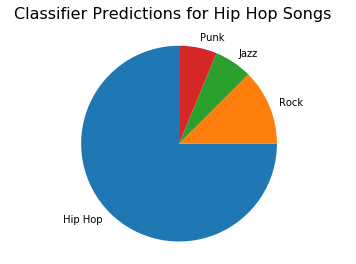

In [30]:
labels = pd.Series(preds[df[675:]['Genre'] == 'Hip Hop']).value_counts().index
sizes = pd.Series(preds[df[675:]['Genre'] == 'Hip Hop']).value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,startangle=90)
ax1.axis('equal')
fig1.suptitle('Classifier Predictions for Hip Hop Songs', fontsize=16)
plt.show()

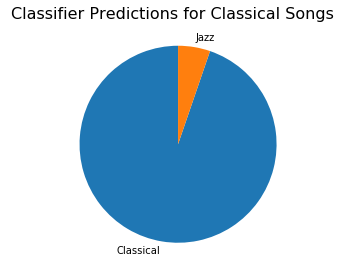

In [31]:
labels = pd.Series(preds[df[675:]['Genre'] == 'Classical']).value_counts().index
sizes = pd.Series(preds[df[675:]['Genre'] == 'Classical']).value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,startangle=90)
ax1.axis('equal')
fig1.suptitle('Classifier Predictions for Classical Songs', fontsize=16)
plt.show()

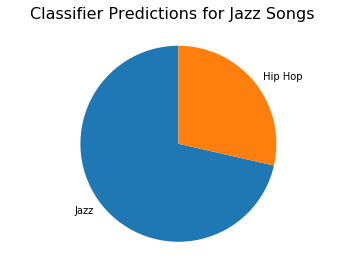

In [32]:
labels = pd.Series(preds[df[675:]['Genre'] == 'Jazz']).value_counts().index
sizes = pd.Series(preds[df[675:]['Genre'] == 'Jazz']).value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,startangle=90)
ax1.axis('equal')
fig1.suptitle('Classifier Predictions for Jazz Songs', fontsize=16)
plt.show()

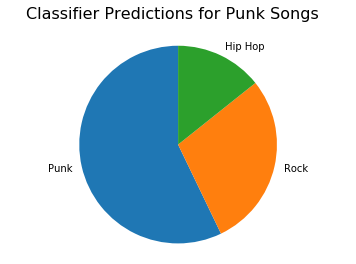

In [33]:
labels = pd.Series(preds[df[675:]['Genre'] == 'Punk']).value_counts().index
sizes = pd.Series(preds[df[675:]['Genre'] == 'Punk']).value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,startangle=90)
ax1.axis('equal')
fig1.suptitle('Classifier Predictions for Punk Songs', fontsize=16)
plt.show()